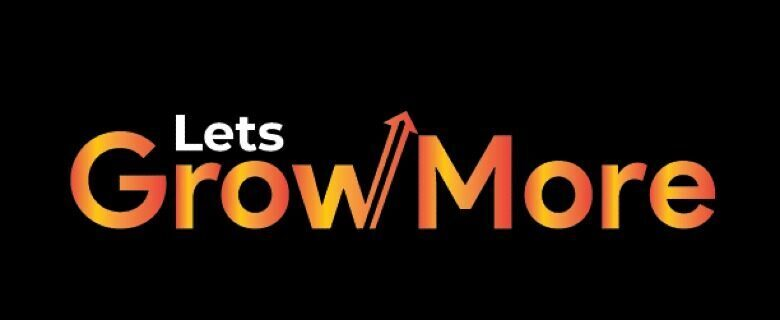


LGMVIP - Data Science Intern, August-2022







 Name - Sanskar Kesharwani



TASK 2 (Advanced Level Task) Next Word Prediction

In [ ]:
from google.colab import files
from google.colab import drive
from IPython.display import Image
drive.mount('/content/drive/')

Mounted at /content/drive/


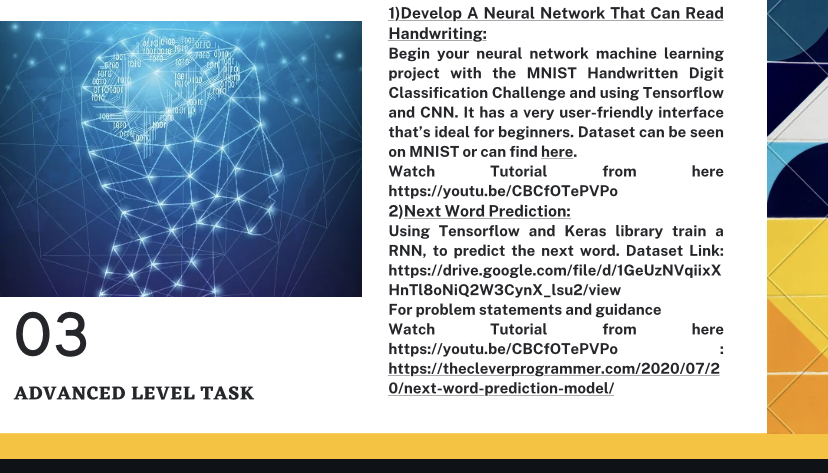

In [ ]:
Image("/content/IMG_1640.jpg")

Dataset: https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view



In [ ]:
import tensorflow as tf
import numpy as np
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import heapq
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/1661-0.txt/1661-0.txt', encoding="utf8").read().lower()

In [ ]:
print('corpus length:', len(file))

corpus length: 581888


In [ ]:
file = open("/content/drive/MyDrive/Colab Notebooks/1661-0.txt/1661-0.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print(lines)

['\ufeff\n', "Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n", '\n', 'This eBook is for the use of anyone anywhere at no cost and with\n', 'almost no restrictions whatsoever.  You may copy it, give it away or\n', 're-use it under the terms of the Project Gutenberg License included\n', 'with this eBook or online at www.gutenberg.net\n', '\n', '\n', 'Title: The Adventures of Sherlock Holmes\n', '\n', 'Author: Arthur Conan Doyle\n', '\n', 'Release Date: November 29, 2002 [EBook #1661]\n', 'Last Updated: May 20, 2019\n', '\n', 'Language: English\n', '\n', 'Character set encoding: UTF-8\n', '\n', '*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n', '\n', '\n', '\n', 'Produced by an anonymous Project Gutenberg volunteer and Jose Menendez\n', '\n', '\n', '\n', 'cover\n', '\n', '\n', '\n', 'The Adventures of Sherlock Holmes\n', '\n', '\n', '\n', 'by Arthur Conan Doyle\n', '\n', '\n', '\n', 'Contents\n', '\n', '\n', '   I.     A Sc

In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

" Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Adventures of Sherl"

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

' Project Gutenberg s The Adventures of Sherlock Holmes  by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg net   Title  The Adventures of Sherlock Holmes  Author  Arthur Conan Doyle  Release Date  November 29  2002  EBook  1661  Last Updated  May 20  2019  Language  English  Charact'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use anyone anywhere at no cost and with almost restrictions whatsoever. You may copy it, give it away or re-use under terms Gutenberg License included this online www.gutenberg.net Title: Holmes Author: Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES SHERLOCK HOLMES Prod"

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])


pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[838, 3083, 56, 322, 57, 1523, 15, 95, 839, 3084]

In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17678


array([[ 838, 3083],
       [3083,   56],
       [  56,  322],
       [ 322,   57],
       [  57, 1523],
       [1523,   15],
       [  15,   95],
       [  95,  839],
       [ 839, 3084],
       [3084, 3085]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 838 3083   56  322   57]
The responses are:  [3083   56  322   57 1523]


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8931


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             89310     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8931)              8939931   
                                                                 
Total params: 22,078,241
Trainable params: 22,078,241
Non-trainable params: 0
_________________________________________________________________


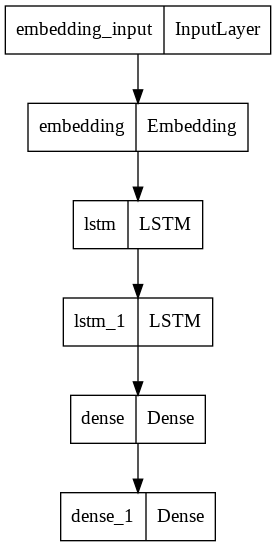

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer= Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/20
277/277 [==============================] - ETA: 0s - loss: 2.3099
Epoch 1: loss improved from 2.32883 to 2.30995, saving model to nextword1.h5
277/277 [==============================] - 96s 345ms/step - loss: 2.3099 - lr: 0.0010
Epoch 2/20
277/277 [==============================] - ETA: 0s - loss: 2.2650
Epoch 2: loss improved from 2.30995 to 2.26498, saving model to nextword1.h5
277/277 [==============================] - 95s 344ms/step - loss: 2.2650 - lr: 0.0010
Epoch 3/20
277/277 [==============================] - ETA: 0s - loss: 2.2135
Epoch 3: loss improved from 2.26498 to 2.21354, saving model to nextword1.h5
277/277 [==============================] - 101s 364ms/step - loss: 2.2135 - lr: 0.0010
Epoch 4/20
277/277 [==============================] - ETA: 0s - loss: 2.1839
Epoch 4: loss improved from 2.21354 to 2.18395, saving model to nextword1.h5
277/277 [==============================] - 95s 344ms/step - loss: 2.1839 - lr: 0.0010
Epoch 5/20
277/277 [===================